## wordcloud
자주 나타나는 단어를 크게 보여줌

In [ ]:
pip install wordcloud

In [6]:
from konlpy.corpus import kolaw

fids = kolaw.fileids()
fobj = kolaw.open(fids[0])
print(fobj.read(140))

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모


In [7]:
ko_doc = fobj.read()

In [17]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color = 'white', 
    max_words=2000,
    font_path=r'C:\Windows\Fonts\gulim.ttc'
)
wc = wc.generate(ko_doc)

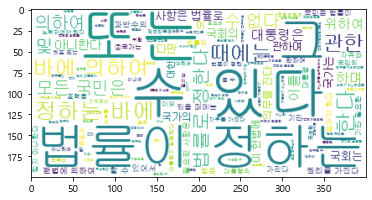

In [18]:
import matplotlib.pyplot as plt

plt.imshow(wc, interpolation="bilinear")
plt.show()

In [21]:
from collections import Counter

wc = WordCloud(
    background_color = 'white', 
    max_words=2000,
    font_path=r'C:\Windows\Fonts\gulim.ttc'
)
count = Counter(ko_doc.split())
wc = wc.generate_from_frequencies(count)

In [22]:
count.most_common(20)

[('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다.', 57),
 ('한다.', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('법률로', 30),
 ('모든', 29),
 ('정한다.', 28),
 ('위하여', 26),
 ('가진다.', 25),
 ('아니한다.', 25),
 ('및', 25)]

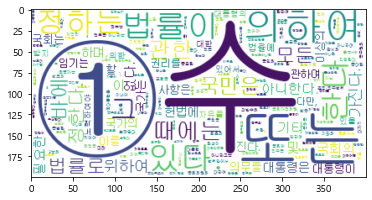

In [24]:
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [25]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
ko_doc_noun = okt.nouns(ko_doc)
print(ko_doc_noun)

In [28]:
count_noun = Counter(ko_doc_noun)

wc_noun = WordCloud(
    background_color = 'white', 
    max_words=2000,
    font_path=r'C:\Windows\Fonts\gulim.ttc'
)
wc_noun = wc_noun.generate_from_frequencies(count_noun)

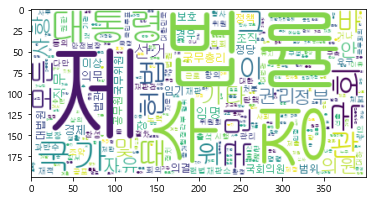

In [29]:
plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

In [30]:
count_noun.most_common(20)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 60),
 ('관', 58),
 ('때', 55),
 ('헌법', 52),
 ('그', 47),
 ('이', 38),
 ('바', 37),
 ('모든', 36),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21)]

In [31]:
count_noun.pop('제')

175

In [32]:
stopword_list = []

for noun_word in count_noun:
    if len(noun_word) == 1:
        stopword_list.append(noun_word)

stopword_list[:5]

['안', '밖', '함', '것', '차']

In [33]:
for stopword in stopword_list:
    count_noun.pop(stopword)

In [34]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

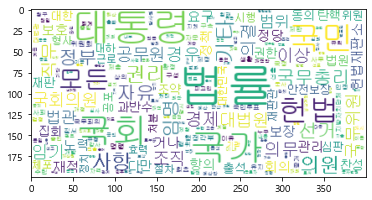

In [36]:
plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

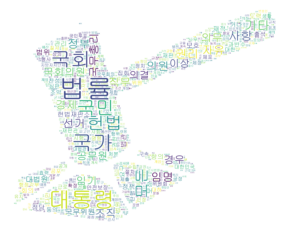

In [40]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('law.jpg'))

wc_img = WordCloud(
    background_color='white',
    max_words=2000,
    font_path=r'C:\Windows\Fonts\gulim.ttc',
    mask=img_mask
)

wc_img = wc_img.generate_from_frequencies(count_noun)

plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()